# Install all the required packages.

In [2]:
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)
if(!require(akima)) install.packages("akima")
library(akima)
if(!require(RCurl)) install.packages("RCurl")
library(RCurl)

# Upload a dataset for practice

In [4]:
if(!require(readr)) install.packages("readr")
library(readr)
github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/main/grain_yield_map.csv"
df= data.frame(read_csv(url(github), show_col_types=FALSE))

head (df,5)

,Latitude,Longitude,GY
,<dbl>,<dbl>,<dbl>
1,12.15725,-106.1403,16.248
2,12.15724,-106.1399,26.703
3,12.15724,-106.1395,16.569
4,12.15723,-106.1391,21.451
5,12.15722,-106.1387,19.107


# Extract columns for latitude, longitude, and y (output)

In [5]:
latitude= df$Latitude
longitude= df$Longitude
output= df$GY

# Interpolate data

In [6]:
grid_data=interp(longitude, latitude, output, nx=70, ny=70)
grid_df=expand.grid(x=grid_data$x, y=grid_data$y)
grid_df$z=as.vector(grid_data$z)
grid_df=na.omit(grid_df)

# Plot using ggplot2

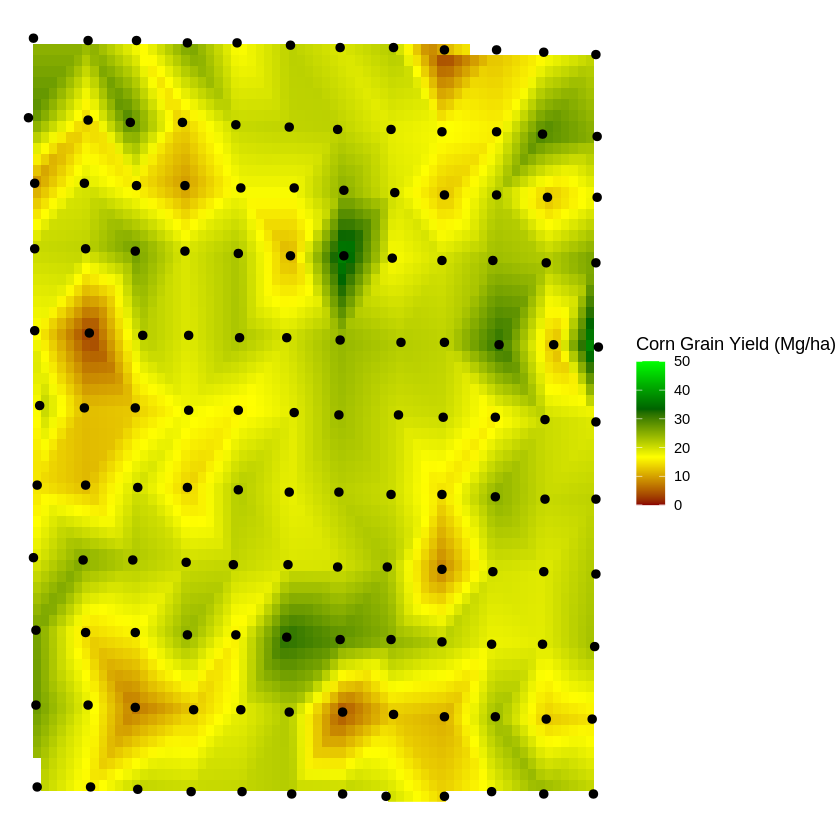

In [7]:
ggplot() +
  geom_raster(data=grid_df, aes(x=x, y=y, fill=z)) +
  scale_fill_gradientn(colors=c("darkred", "yellow", "darkgreen", "green"),
                       name="Corn Grain Yield (Mg/ha)",
                       limits=c(0, 50),
                       breaks=seq(0, 50, 10)) +
  geom_point(data=df, aes(x=Longitude, y=Latitude), color="black", size=2) +
  theme_void()